<a href="https://colab.research.google.com/github/kushal-h/Deep-Learning-Implementations/blob/master/CNN/Plant_disease_detection_base_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

files.upload()

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

 99% 2.03G/2.04G [00:18<00:00, 116MB/s]
100% 2.04G/2.04G [00:18<00:00, 117MB/s]


In [ ]:
!unzip /content/plantvillage-dataset.zip

Installing folder split library

In [ ]:
!pip install split-folders

Splitting the data into test and training dataset

In [ ]:
import splitfolders  # or import split_folders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio('/content/plantvillage dataset/segmented', output="out", seed=1337, ratio=(0.9, 0.1),
                   group_prefix=None) # default values


Copying files: 0 files [00:00, ? files/s]
Copying files: 622 files [00:00, 6215.74 files/s]
Copying files: 1100 files [00:00, 5700.57 files/s]
Copying files: 1913 files [00:00, 6260.73 files/s]
Copying files: 2541 files [00:00, 6264.52 files/s]
Copying files: 3260 files [00:00, 6512.28 files/s]
Copying files: 3921 files [00:00, 5205.70 files/s]
Copying files: 4497 files [00:00, 5359.24 files/s]
Copying files: 5196 files [00:00, 5760.74 files/s]
Copying files: 5771 files [00:00, 5646.92 files/s]
Copying files: 6442 files [00:01, 5926.70 files/s]
Copying files: 7038 files [00:01, 5753.93 files/s]
Copying files: 7769 files [00:01, 6144.68 files/s]
Copying files: 8394 files [00:01, 5972.02 files/s]
Copying files: 9105 files [00:01, 6271.65 files/s]
Copying files: 9742 files [00:01, 3133.51 files/s]
Copying files: 10232 files [00:02, 2853.53 files/s]
Copying files: 10646 files [00:02, 3086.39 files/s]
Copying files: 11050 files [00:02, 3063.10 files/s]
Copying files: 11655 files [00:02, 35

Import neccessary packages

In [ ]:
import numpy as np
import pickle
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

Dataset path

In [ ]:
train_data_dir = '/content/out/train'
val_data_dir = '/content/out/val'

Data Generators

In [ ]:
# Data Augmentation
train_datagen = ImageDataGenerator(
     rescale=1./255,
     rotation_range=15,
     width_shift_range=0.3,
     height_shift_range=0.3,
     horizontal_flip=True,
     fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(128,128),
    batch_size=228,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
      val_data_dir,
      target_size=(128,128),
      batch_size=228,
      class_mode='categorical')


Found 48858 images belonging to 38 classes.
Found 5448 images belonging to 38 classes.


Model creation

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape = (128,128, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(38))
model.add(Activation('softmax'))

Model summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0

In [ ]:
model.compile(optimizer= 'adam', loss='categorical_crossentropy',
                metrics = ['accuracy'])

Traning the model

In [ ]:
model_check_point = tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/Agridoc model/model.h5', 
                                                      monitor = 'val_loss',
                                                      verbose = 1, 
                                                      save_best_only= True)

In [ ]:
callbacks = [model_check_point]  

In [ ]:
history = model.fit(train_generator,epochs=2, validation_data=validation_generator, callbacks = callbacks) 

Epoch 1/2
215/215 [==============================] - 2206s 10s/step - loss: 1.3011 - accuracy: 0.6248 - val_loss: 0.7856 - val_accuracy: 0.7625

Epoch 00001: val_loss improved from inf to 0.78562, saving model to /content/drive/MyDrive/Agridoc model/model.h5
Epoch 2/2
215/215 [==============================] - 2208s 10s/step - loss: 0.8229 - accuracy: 0.7509 - val_loss: 1.0206 - val_accuracy: 0.7021

Epoch 00002: val_loss did not improve from 0.78562


test data accuracy

In [ ]:
model.evaluate(validation_generator)

24/24 [==============================] - 64s 3s/step - loss: 1.0206 - accuracy: 0.7021


[1.0205928087234497, 0.7020925283432007]

Re-train

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/Agridoc model/model.h5")

Traning the model

In [ ]:
model_check_point = tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/Agridoc model/model.h5', 
                                                     monitor = 'val_loss',
                                                      verbose = 1, 
                                                      save_best_only= True,
                                                       mode= 'min')

In [ ]:
callbacks = [model_check_point]  

In [ ]:
history = model.fit(train_generator,epochs=6, validation_data=validation_generator, callbacks = callbacks, initial_epoch = 2) 

Epoch 3/6
215/215 [==============================] - 2210s 10s/step - loss: 0.7856 - accuracy: 0.7591 - val_loss: 0.8075 - val_accuracy: 0.7555

Epoch 00003: val_loss improved from inf to 0.80753, saving model to /content/drive/MyDrive/Agridoc model/model.h5
Epoch 4/6
215/215 [==============================] - 2196s 10s/step - loss: 0.6646 - accuracy: 0.7917 - val_loss: 1.0941 - val_accuracy: 0.6780

Epoch 00004: val_loss did not improve from 0.80753
Epoch 5/6
215/215 [==============================] - 2196s 10s/step - loss: 0.5679 - accuracy: 0.8226 - val_loss: 0.7756 - val_accuracy: 0.7676

Epoch 00005: val_loss improved from 0.80753 to 0.77558, saving model to /content/drive/MyDrive/Agridoc model/model.h5
Epoch 6/6
215/215 [==============================] - 2189s 10s/step - loss: 0.5082 - accuracy: 0.8396 - val_loss: 0.5435 - val_accuracy: 0.8365

Epoch 00006: val_loss improved from 0.77558 to 0.54354, saving model to /content/drive/MyDrive/Agridoc model/model.h5


In [ ]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(validation_generator)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
24/24 [==============================] - 65s 3s/step - loss: 0.5435 - accuracy: 0.8365
Test Accuracy: 83.64537358283997


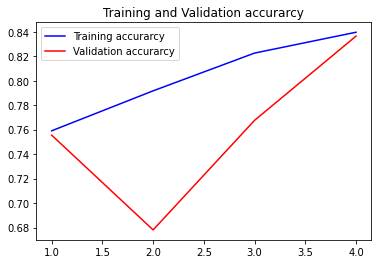

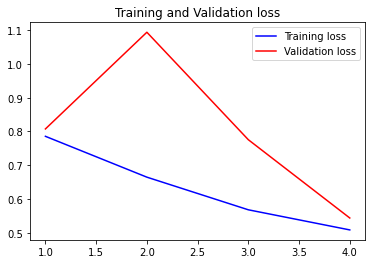

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

train data accuracy

In [ ]:
model.evaluate(validation_generator)

24/24 [==============================] - 65s 3s/step - loss: 0.5435 - accuracy: 0.8365


[0.5435417890548706, 0.8364537358283997]

In [ ]:
history = model.fit(train_generator,epochs=10, validation_data=validation_generator, callbacks = callbacks, initial_epoch = 6) 

Epoch 7/10
215/215 [==============================] - 2222s 10s/step - loss: 0.4511 - accuracy: 0.8565 - val_loss: 0.8366 - val_accuracy: 0.7682

Epoch 00007: val_loss improved from inf to 0.83661, saving model to /content/drive/MyDrive/Agridoc model/model.h5
Epoch 8/10
215/215 [==============================] - 2229s 10s/step - loss: 0.4181 - accuracy: 0.8656 - val_loss: 0.6566 - val_accuracy: 0.8058

Epoch 00008: val_loss improved from 0.83661 to 0.65664, saving model to /content/drive/MyDrive/Agridoc model/model.h5
Epoch 9/10
215/215 [==============================] - 2216s 10s/step - loss: 0.3852 - accuracy: 0.8772 - val_loss: 0.8835 - val_accuracy: 0.7575

Epoch 00009: val_loss did not improve from 0.65664
Epoch 10/10
215/215 [==============================] - 2206s 10s/step - loss: 0.3664 - accuracy: 0.8830 - val_loss: 0.3521 - val_accuracy: 0.8939

Epoch 00010: val_loss improved from 0.65664 to 0.35210, saving model to /content/drive/MyDrive/Agridoc model/model.h5


In [ ]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(validation_generator)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
24/24 [==============================] - 65s 3s/step - loss: 0.3521 - accuracy: 0.8939
Test Accuracy: 89.39059972763062


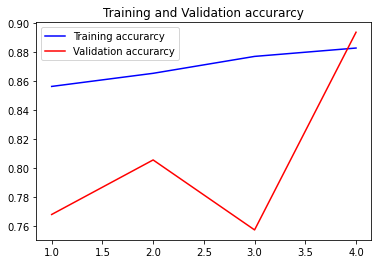

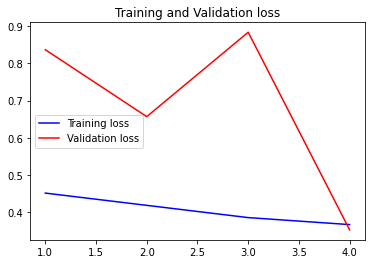

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

Re train after 10 epoch

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/Agridoc model/model.h5")

model evaluate before retrain

In [ ]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(validation_generator)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
24/24 [==============================] - 66s 3s/step - loss: 0.3521 - accuracy: 0.8939
Test Accuracy: 89.39059972763062


In [ ]:
model_check_point = tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/Agridoc model/model.h5', 
                                                     monitor = 'val_loss',
                                                      verbose = 1, 
                                                      save_best_only= True)

In [ ]:
callbacks = [model_check_point]  

In [ ]:
history = model.fit(train_generator,epochs=16, validation_data=validation_generator, callbacks = callbacks, initial_epoch = 10) 

Epoch 11/16
215/215 [==============================] - 2198s 10s/step - loss: 0.3405 - accuracy: 0.8907 - val_loss: 0.6684 - val_accuracy: 0.8133

Epoch 00011: val_loss improved from inf to 0.66844, saving model to /content/drive/MyDrive/Agridoc model/model.h5
Epoch 12/16
215/215 [==============================] - 2196s 10s/step - loss: 0.3163 - accuracy: 0.8991 - val_loss: 0.6678 - val_accuracy: 0.8183

Epoch 00012: val_loss improved from 0.66844 to 0.66781, saving model to /content/drive/MyDrive/Agridoc model/model.h5
Epoch 13/16
215/215 [==============================] - 2192s 10s/step - loss: 0.2924 - accuracy: 0.9059 - val_loss: 0.7028 - val_accuracy: 0.8142

Epoch 00013: val_loss did not improve from 0.66781
Epoch 14/16
215/215 [==============================] - 2194s 10s/step - loss: 0.2829 - accuracy: 0.9087 - val_loss: 0.5800 - val_accuracy: 0.8297

Epoch 00014: val_loss improved from 0.66781 to 0.57997, saving model to /content/drive/MyDrive/Agridoc model/model.h5
Epoch 15/16

In [ ]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(validation_generator)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
24/24 [==============================] - 65s 3s/step - loss: 0.8182 - accuracy: 0.8064
Test Accuracy: 80.63509464263916


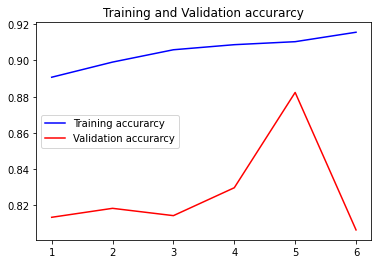

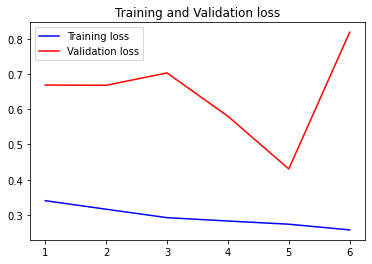

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
history = model.fit(train_generator,epochs=22, validation_data=validation_generator, callbacks = callbacks, initial_epoch = 16) 

Epoch 17/22
215/215 [==============================] - 2220s 10s/step - loss: 0.2508 - accuracy: 0.9179 - val_loss: 0.6155 - val_accuracy: 0.8399

Epoch 00017: val_loss did not improve from 0.43060
Epoch 18/22
215/215 [==============================] - 2219s 10s/step - loss: 0.2511 - accuracy: 0.9177 - val_loss: 0.6128 - val_accuracy: 0.8300

Epoch 00018: val_loss did not improve from 0.43060
Epoch 19/22
215/215 [==============================] - 2217s 10s/step - loss: 0.2364 - accuracy: 0.9228 - val_loss: 0.6704 - val_accuracy: 0.8275

Epoch 00019: val_loss did not improve from 0.43060
Epoch 20/22
215/215 [==============================] - 2199s 10s/step - loss: 0.2209 - accuracy: 0.9280 - val_loss: 0.5225 - val_accuracy: 0.8594

Epoch 00020: val_loss did not improve from 0.43060
Epoch 21/22
215/215 [==============================] - 2196s 10s/step - loss: 0.2250 - accuracy: 0.9262 - val_loss: 0.3689 - val_accuracy: 0.8945

Epoch 00021: val_loss improved from 0.43060 to 0.36891, savin

In [ ]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(validation_generator)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
24/24 [==============================] - 64s 3s/step - loss: 0.6268 - accuracy: 0.8304
Test Accuracy: 83.03964734077454


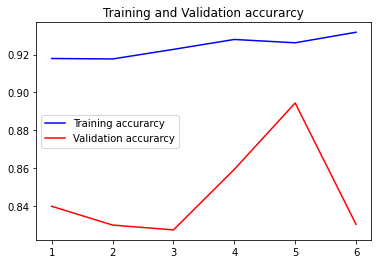

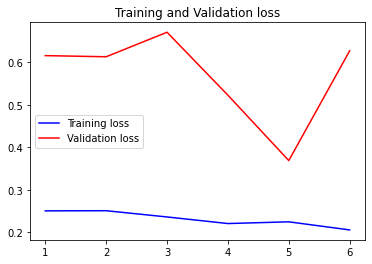

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
history = model.fit(train_generator,epochs=24, validation_data=validation_generator, callbacks = callbacks, initial_epoch = 22) 

Epoch 23/24
215/215 [==============================] - 2208s 10s/step - loss: 0.2170 - accuracy: 0.9292 - val_loss: 0.3362 - val_accuracy: 0.9022

Epoch 00023: val_loss improved from inf to 0.33619, saving model to /content/drive/MyDrive/Agridoc model/model.h5
Epoch 24/24
215/215 [==============================] - 2210s 10s/step - loss: 0.2023 - accuracy: 0.9326 - val_loss: 0.7572 - val_accuracy: 0.8102

Epoch 00024: val_loss did not improve from 0.33619


In [ ]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(validation_generator)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
24/24 [==============================] - 65s 3s/step - loss: 0.7572 - accuracy: 0.8102
Test Accuracy: 81.02055788040161


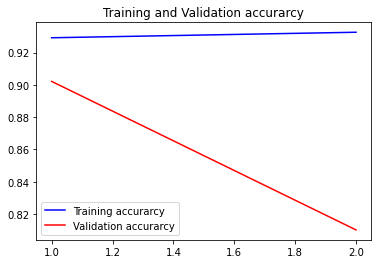

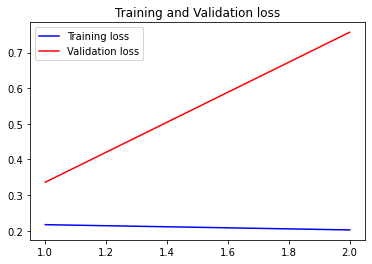

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
model1 = tf.keras.models.load_model("/content/drive/MyDrive/Agridoc model/model.h5")

In [ ]:
print("[INFO] Calculating model accuracy")
scores = model1.evaluate(validation_generator)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
24/24 [==============================] - 64s 3s/step - loss: 0.3362 - accuracy: 0.9022
Test Accuracy: 90.2165949344635
